In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# load preprocessed dataset
X_train = pd.read_csv("train_inputs.csv")
y_train = pd.read_csv("train_targets.csv")
X_test = pd.read_csv("test_inputs.csv")
y_test = pd.read_csv("test_targets.csv")


In [7]:
X_train.drop(columns=X_train.columns[0], axis=1, inplace=True)
y_train.drop(columns=y_train.columns[0], axis=1, inplace=True)
X_test.drop(columns=X_test.columns[0], axis=1, inplace=True)
y_test.drop(columns=y_test.columns[0], axis=1, inplace=True)


In [8]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW.2,NW.2,S.2,SE.2,SSE.2,SSW.2,SW.2,W.2,WNW.2,WSW.2
0,0.556604,0.542533,0.0,0.220183,0.579310,0.472868,0.345455,0.385965,0.38,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.429245,0.359168,1.0,0.220183,0.579310,0.341085,0.272727,0.491228,0.91,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.511792,0.570888,0.0,0.146789,0.606897,0.186047,0.109091,0.298246,0.79,0.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.379717,0.370510,0.0,0.183486,0.482759,0.682171,0.545455,0.614035,0.52,0.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.504717,0.510397,0.0,0.183486,0.544828,0.240310,0.272727,0.350877,0.69,0.52,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# train a decision tree model on the training set
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
model = DecisionTreeClassifier(random_state=42)

# fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Predict Result

In [10]:
y_pred_test = model.predict(X_test)
y_pred_test

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [11]:
# probability of getting output as 0 - no rain
model.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Check accuracy score

In [12]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7869


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

#### Compare the train-set and test-set accuracy
 Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [13]:
y_pred_train = model.predict(X_train)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Model accuracy score: 1.0000


#### Check for overfitting and underfitting 
     

In [14]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7869


The training-set accuracy score is 0.7869 while the test-set accuracy to be 1.000. These two values are quite comparable. So, there is a overfitting.

In [15]:
y_test.value_counts() / len(y_test)

RainTomorrow
No              0.777032
Yes             0.222968
dtype: float64

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No".

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [16]:
from sklearn.tree import plot_tree, export_text

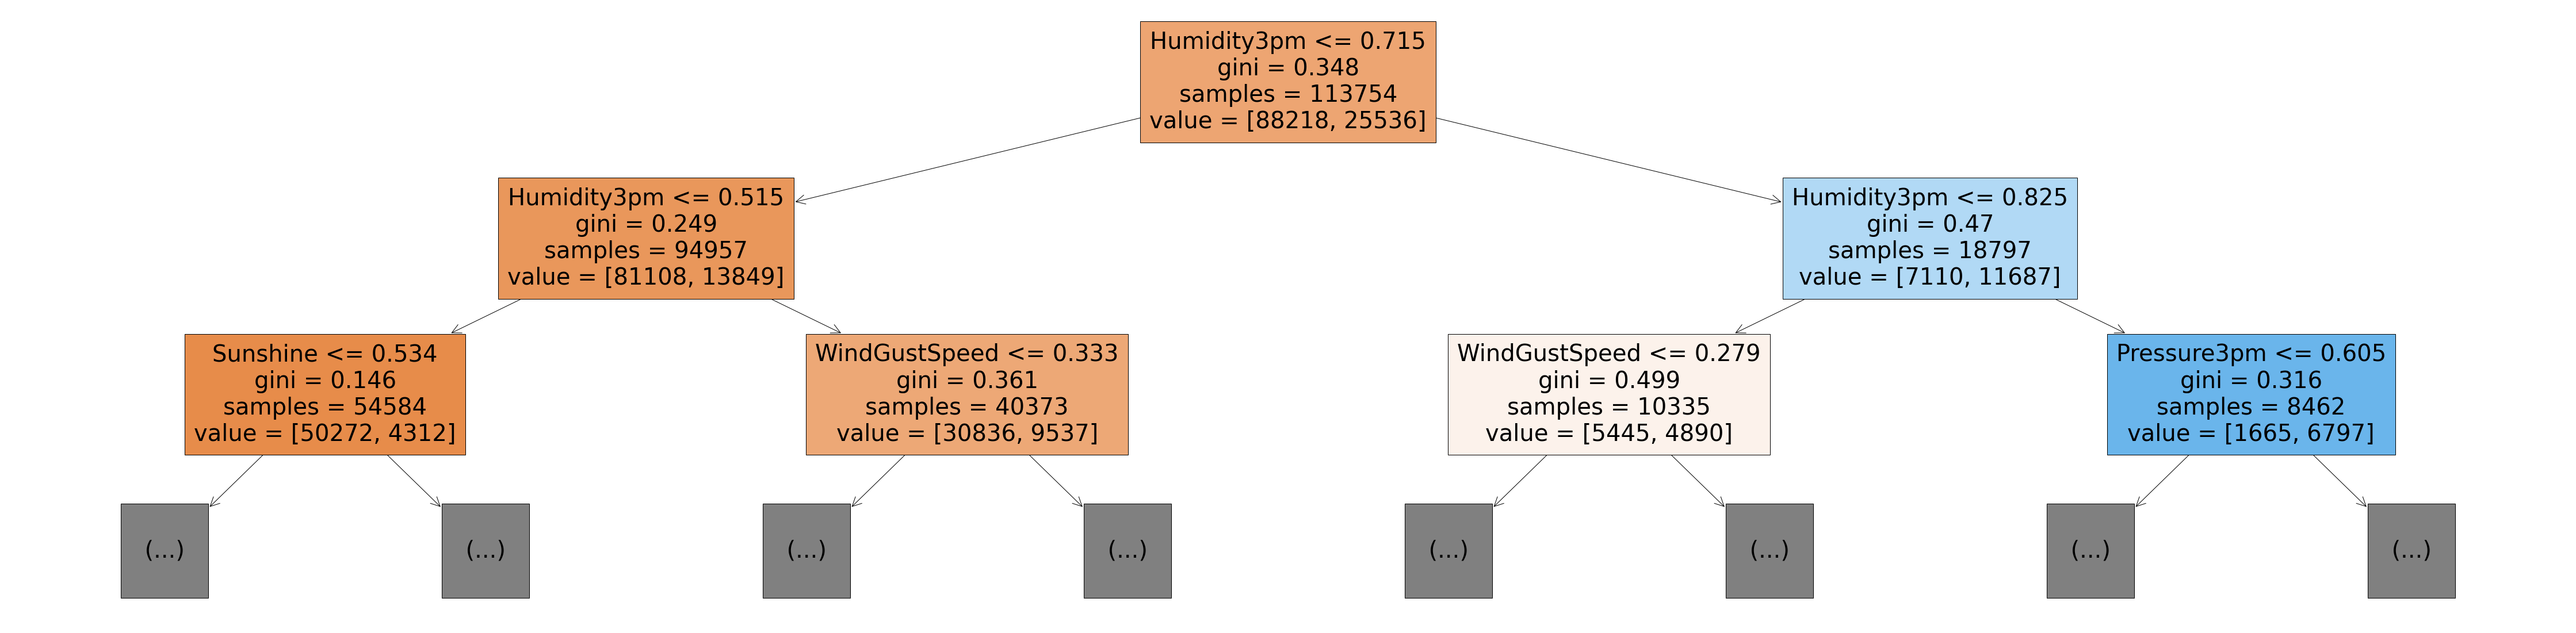

In [17]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True);

check the depth of the tree that was created.

In [18]:
model.tree_.max_depth

45

We can also display the tree as text, which can be easier to follow for deeper trees.

In [19]:
tree_text = export_text(model,max_depth=10,feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.56
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- MinTemp <= 0.56
|   |   |   |   |   |   |--- Sunshine <= 0.13
|   |   |   |   |   |   |   |--- Humidity9am <= 0.46
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.26
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.26
|   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.61
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.53
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.53
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- Temp9am >  0.61
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Humidity9am >  0.46
|   |   |   |   |   |   |   |   |--- Evaporation <= 0.07


### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [20]:
model.feature_importances_

array([4.02517393e-02, 3.34497779e-02, 2.79553799e-02, 2.07806856e-02,
       4.26221764e-02, 6.11829126e-02, 2.54181020e-02, 2.96354050e-02,
       3.53424247e-02, 2.69666200e-01, 3.72940547e-02, 6.10977273e-02,
       1.34604220e-02, 1.59386745e-02, 3.53187899e-02, 3.42058757e-02,
       9.62068463e-03, 8.79175290e-03, 9.47387261e-03, 6.37918166e-04,
       1.15380531e-03, 1.85696110e-03, 1.36566530e-03, 1.39876779e-03,
       6.34645757e-04, 1.33450098e-03, 1.30769184e-03, 1.69360815e-03,
       1.69182029e-03, 8.19827033e-04, 1.62972608e-03, 1.04407427e-03,
       1.59222091e-03, 1.89154134e-03, 1.74532005e-04, 1.06011777e-03,
       1.87319186e-03, 8.02814649e-05, 1.03603322e-03, 1.41492699e-03,
       1.15967365e-03, 6.26057686e-04, 1.07435827e-03, 1.52345675e-03,
       1.60100231e-03, 6.24832380e-04, 8.66161672e-04, 2.17134920e-03,
       1.16774375e-03, 1.63919120e-03, 1.41979884e-03, 6.61941265e-04,
       1.16102301e-03, 1.67832492e-03, 1.60276639e-03, 1.61576141e-03,
      

turn this into a dataframe and visualize the most important features.

In [21]:
important_df =pd.DataFrame({
    'feature':X_train.columns,
    'important':model.feature_importances_,
}).sort_values('important',ascending=False)
important_df

,feature,important
9,Humidity3pm,0.269666
5,WindGustSpeed,0.061183
11,Pressure3pm,0.061098
4,Sunshine,0.042622
0,MinTemp,0.040252
...,...,...
69,Woomera,0.000517
60,Townsville,0.000450
62,Uluru,0.000361
34,Darwin,0.000175


In [22]:
important_df.head(10)

,feature,important
9,Humidity3pm,0.269666
5,WindGustSpeed,0.061183
11,Pressure3pm,0.061098
4,Sunshine,0.042622
0,MinTemp,0.040252
10,Pressure9am,0.037294
8,Humidity9am,0.035342
14,Temp9am,0.035319
15,Temp3pm,0.034206
1,MaxTemp,0.033450


<AxesSubplot:title={'center':'important feature'}, xlabel='important', ylabel='feature'>

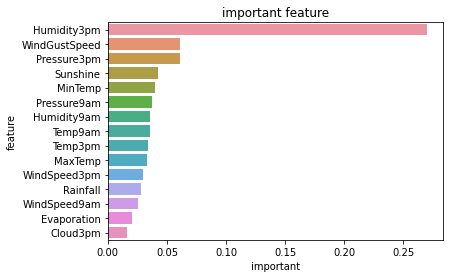

In [23]:
# barplot of top 15 important feature
import seaborn as sns

plt.title('important feature')
sns.barplot(data=important_df.head(15),x='important',y='feature')

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [24]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    al

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

In [32]:
# model
model2 = DecisionTreeClassifier(max_depth=3,random_state=42)

In [33]:
# fit the model
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and testing sets using `model.score`

In [34]:
model2.score(X_train,y_train)

0.8290170015999437

In [35]:
model2.score(X_test, y_test)

0.8271387882836949

while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [36]:
model.classes_

array(['No', 'Yes'], dtype=object)

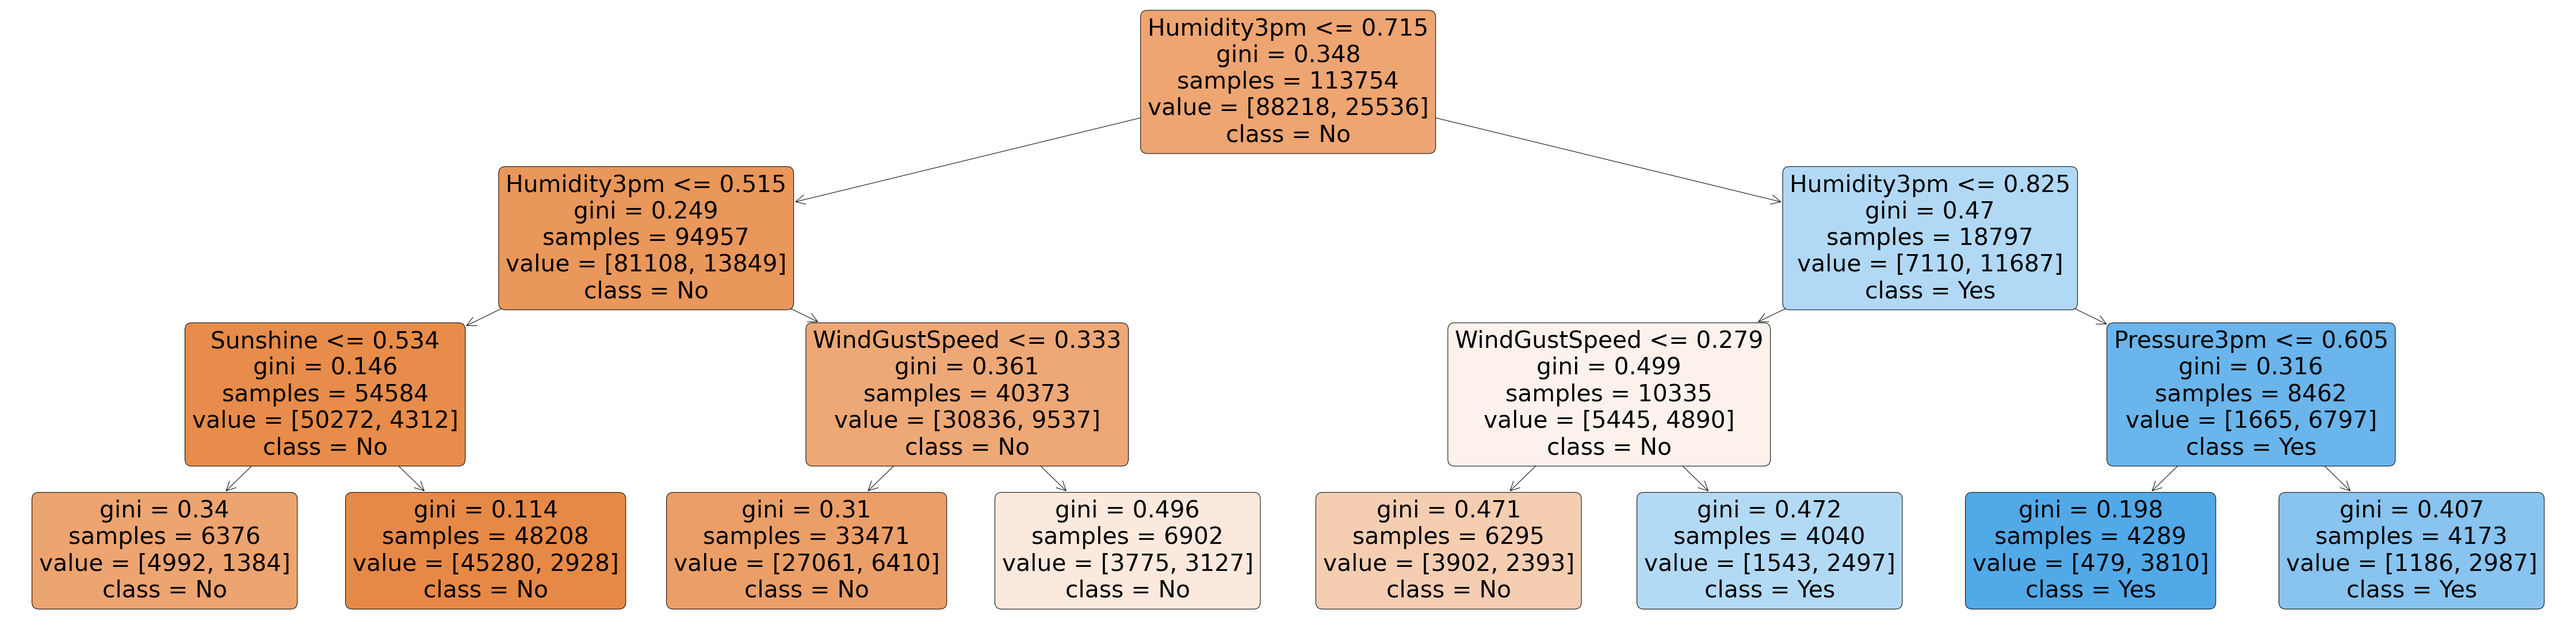

In [37]:
# drawn tree
plt.figure(figsize=(80,20))
plot_tree(model2, feature_names=X_train.columns, class_names = model2.classes_, filled=True,rounded=True);

In [38]:
print(export_text(model, feature_names=list(X_train.columns)))


|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.56
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- MinTemp <= 0.56
|   |   |   |   |   |   |--- Sunshine <= 0.13
|   |   |   |   |   |   |   |--- Humidity9am <= 0.46
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.26
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.26
|   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.61
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.53
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.53
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- Temp9am >  0.61
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Humidity9am >  0.46
|   |   |   |   |   |   |   |   |--- Evaporation <= 0.07


Let's experiment with different depths using a helper function.

In [46]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train,y_train)
    train_err = 1-model.score(X_train,y_train)
    test_err = 1-model.score(X_test,y_test)
    return {'Max Depth': md, 'Training Error': train_err, 'Testing Error': test_err}
    

In [47]:
%%time 
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

Wall time: 36.8 s


In [48]:
error_df

,Max Depth,Training Error,Testing Error
0,1,0.184248,0.187313
1,2,0.179370,0.180281
2,3,0.170983,0.172861
3,4,0.165533,0.169837
4,5,0.161128,0.164387
5,6,0.156997,0.163859
6,7,0.154122,0.162980
7,8,0.149630,0.162383
8,9,0.143635,0.161117
9,10,0.136848,0.160273


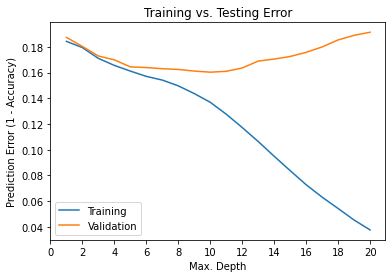

In [53]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(range(0,21,2));
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])


You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 10 results in the lowest validation error.

In [55]:
model = DecisionTreeClassifier(max_depth=10,random_state=42).fit(X_train,y_train)
model.score(X_test,y_test)

0.8397271352719856

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [56]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42).fit(X_train, y_train)

In [57]:
model.score(X_train,y_train)

0.8474515181883714

In [58]:
model.score(X_test,y_test)

0.8391293646049439

In [61]:
model.tree_.max_depth

10

Notice that the model was able to achieve a greater depth of 10 for certain paths while keeping other paths shorter.

In [62]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.56
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- MinTemp <= 0.56
|   |   |   |   |   |   |--- Sunshine <= 0.13
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.13
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- MinTemp >  0.56
|   |   |   |   |   |   |--- class: No
|   |   |   |   |--- WindGustSpeed >  0.36
|   |   |   |   |   |--- Humidity3pm <= 0.23
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.23
|   |   |   |   |   |   |--- Temp3pm <= 0.67
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.47
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.47
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Temp3pm >  0.67
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |--- Pressure3pm 